
 #  <span style="color:#D47FAC;"> <center>LIST 4 </center> </span>

Authors: _Jakubik Małgorzata, Szymkowiak Magdalena_

## <span style="color:#D47FAC;">TASK 1</span> 

In [10]:
class QueueBaB(object): #first in, first out
    """
    Klasa implementująca kolejkę za pomocą pythonowej listy tak,
    że początek kolejki jest przechowywany na początku listy.
    """

    def __init__(self):
        self.list_of_items = []

    def enqueue(self, item):
        """
        Metoda służąca do dodawania obiektu do kolejki.
        Pobiera jako argument obiekt który ma być dodany.
        Niczego nie zwraca.
        """ 
        self.list_of_items.append(item)


    def dequeue(self):
        """
        Metoda służąca do ściągania obiektu do kolejki.
        Nie pobiera argumentów.
        Zwraca ściągnięty obiekt.
        """
        return self.list_of_items.pop(0)

    def is_empty(self):
        """
        Metoda służąca do sprawdzania, czy kolejka jest pusta.
        Nie pobiera argumentów.
        Zwraca True jeśli kolejka jest pusta lub False gdy nie jest.
        """
        return self.list_of_items==[]

    def size(self):
        """
        Metoda służąca do określania wielkości kolejki.
        Nie pobiera argumentów.
        Zwraca liczbę obiektów w kolejce.
        """
        return len(self.list_of_items)

    def __str__(self):
        """
        Metoda odpowiadająca za nieformalną reprezentacje kolejki.
        Nie pobiera argumentów.
        """
        return str(self.list_of_items)

In [11]:
first=QueueBaB()

In [12]:
first.is_empty()

True

In [13]:
first.enqueue('4')
first.enqueue(5)
first.enqueue("'a','a'")
first.size()

3

In [14]:
first.dequeue()

'4'

In [15]:
print(first)

[5, "'a','a'"]


In [16]:
class QueueBaE(object): 
    """
    Klasa implementująca kolejkę za pomocą pythonowej listy tak,
    że początek kolejki jest przechowywany na końcu listy.
    """

    def __init__(self):
        self.list_of_items = []

    def enqueue(self, item):
        """
        Metoda służąca do dodawania obiektu do kolejki.
        Pobiera jako argument obiekt który ma być dodany.
        Niczego nie zwraca.
        """
        self.list_of_items.insert(0,item)

    def dequeue(self):
        """
        Metoda służąca do ściągania obiektu do kolejki.
        Nie pobiera argumentów.
        Zwraca ściągnięty obiekt.
        """
        return self.list_of_items.pop()

    def is_empty(self):
        """
        Metoda służąca do sprawdzania, czy kolejka jest pusta.
        Nie pobiera argumentów.
        Zwraca True jeśli kolejka jest pusta lub False gdy nie jest.
        """
        return self.list_of_items==[]

    def size(self):
        """
        Metoda służąca do określania wielkości kolejki.
        Nie pobiera argumentów.
        Zwraca liczbę obiektów w kolejce.
        """
        return len(self.list_of_items)

    def __str__(self):
        """
        Medota odpowiadająca za nieformalną reprezentacje kolejki.
        Nie pobiera argumentów.
        """
        return str(self.list_of_items)

In [17]:
second=QueueBaE()

In [18]:
second.enqueue(4)
second.enqueue(6)
second.enqueue(8)

In [19]:
second.dequeue()

4

In [20]:
print(second)

[8, 6]


In [21]:
second.is_empty()

False

## <span style="color:#D47FAC;">TASK 2</span> 

In [22]:
import time
import matplotlib.pyplot as plt
import numpy as np

Nasz eksperyment polega na porównaniu czasu dodawania i usuwania elementów z kolejek `QueueBaB` i `QueueBaE`. 

Podczas wymyślania eksperymentu zaciekawił nas fakt `czy typ dodawanych argumentów wpływa na czas trwania programów?`, postanowiłyśmy to sprawdzić!

In [23]:
def time_measure(n: int):
    """
    Funkcja mierzy czas dodawania n elementów do kolejek QueueBab i QueueBaE oraz czas usuwania n elementów z kolejek; liczy
    średnią ilość czasu z dodawania i usuwania elementów z kolejek.
    
    param n: liczba elementów do dodania na listy
    return: zwraca krotkę z czasem: dodawania do kolejki BaB, dodawania do kolejki BaE, usuwania z BaB, usuwania z BaE, średnia
    czasów dla BaB, średnia czasów dla BaE
    """
    BaB=QueueBaB()
    BaE=QueueBaE()
    
    
    startB1=time.time()
    for i in range(n):
        BaB.enqueue(i)
    endB1= time.time()
        
    startE1=time.time()
    for i in range(n):
        BaE.enqueue(i)
    endE1=time.time()
    
    startB2=time.time()
    for _ in range(n):
        BaB.dequeue()
    endB2= time.time()
    
    startE2=time.time()
    for _ in range(n):
        BaE.dequeue()
    endE2=time.time()
    
    #średnia czasów z dodawania i usuwania z BaB i BaE
    sr_bab=(endB1-startB1+endE1-startE1)/2
    sr_bae=(endB2-startB2+endE2-startE2)/2
    
    return endB1-startB1, endB2-startB2,endE1-startE1,endE2-startE2, sr_bab,sr_bae

In [24]:
time_measure(10000)

(0.003999471664428711,
 0.023000717163085938,
 0.03500056266784668,
 0.00400090217590332,
 0.019500017166137695,
 0.013500809669494629)

In [25]:
def compare_enqueue(n: int):
    """
    Funkcja rysuje wykresy czasu trwania dodawania n elementów do list QueueBaB i QueueBaE.
    
    param n: ilość elementów dodawanych do list
    """
    
    xb=np.linspace(0,n)
    timeb=np.linspace(0,time_measure(n)[0])
    xe=np.linspace(0,n)
    timee=np.linspace(0,time_measure(n)[1])
    

    plt.plot(xb,timeb, 'C4.',label='QueueBaB')
    plt.plot(xe,timee, 'C5.', label='QueueBaE')
    plt.xlabel('Number of elements')
    plt.ylabel('Time')
    plt.title("Enqueue")
    
    plt.legend()
    plt.grid()
    plt.show()

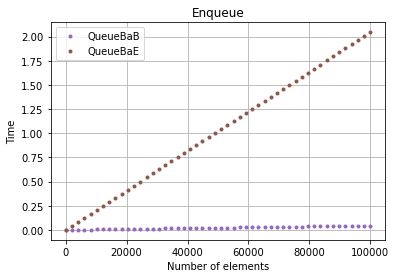

In [26]:
compare_enqueue(100000)

In [27]:
def compare_dequeue(n: int):
    """
    Funkcja rysuje wykresy czasu trwania usuwania n elementów do list QueueBaB i QueueBaE.
    
    param n: ilość elementów usuwanych z list
    """
    
    xb=np.linspace(0,n)
    timeb=np.linspace(0,np.abs(time_measure(n)[2]))
    xe=np.linspace(0,n)
    timee=np.linspace(0,np.abs(time_measure(n)[3]))

    plt.plot(xb,timeb, 'C4.',label='QueueBaB')
    plt.plot(xe,timee, 'C5.', label='QueueBaE')
    plt.xlabel('Number of elements')
    plt.ylabel('Time')
    plt.title("Dequeue")
    
    plt.legend()
    plt.grid()
    plt.show()

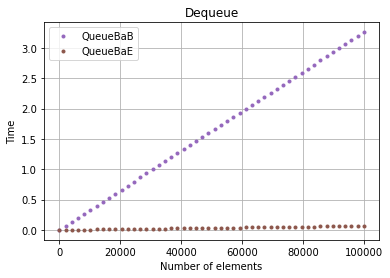

In [28]:
compare_dequeue(100000)

In [29]:
def compare_mean(n: int):
    """
    Funkcja rysuje wykresy średniej ilości czasu potrzbnej do dodania i usunięcia n elementów z list QueueBaB i QueueBaE.
    
    param n: ilość dodawanych i usuwanych elementów
    """
    
    xb=np.linspace(0,n)
    timeb=np.linspace(0,np.abs(time_measure(n)[4]))
    xe=np.linspace(0,n)
    timee=np.linspace(0,np.abs(time_measure(n)[5]))

    plt.plot(xb,timeb, 'C4.',label='QueueBaB')
    plt.plot(xe,timee, 'C5.', label='QueueBaE')
    plt.xlabel('Number of elements')
    plt.ylabel('Time')
    plt.title("Mean of enqueue and dequeue")
    
    plt.legend()
    plt.grid()
    plt.show()

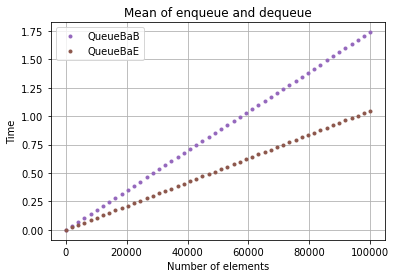

In [30]:
compare_mean(100000)

Teraz wykonamy takie same operacje i obliczenia, jak wyżej tylko na stringu.

In [31]:
def open_txt(filename: str):
    """
    Funkcja otwiera i odczytuje plik .txt
    
    param filename: nazwa pliku txt
    return: listę wyrazów i znaków zawartych w pliku filename
    """
    f=open(filename,"r", encoding="utf-8")
    file=f.read()
    file=file.split()
    return file

In [32]:
len(open_txt("historyjka.txt")*140)

97440

In [33]:
def measure_time_str(filename: str):
    """
    Funkcja mierzy czas dodawania n elementów typu str do kolejek QueueBab i QueueBaE oraz czas usuwania n elementów z kolejek; liczy
    średnią ilość czasu z dodawania i usuwania elementów z kolejek.
    
    param n: liczba elementów do dodania i usunięcia z list
    return: zwraca krotkę z czasem: dodawania do kolejki BaB, dodawania do kolejki BaE, usuwania z BaB, usuwania z BaE, średnia
    czasów dla BaB, średnia czasów dla BaE
    """
    list_of_str=open_txt(filename)
    list_of_str=list_of_str*140 #aby rząd badanych elementów był taki sam jak rząd na liczbach
    BaB=QueueBaB()
    BaE=QueueBaE()
    
    startB1=time.time()
    for i in range(0,len(list_of_str)):
        BaB.enqueue(list_of_str[i])
    endB1=time.time()
    
    startE1=time.time()
    for i in range(0,len(list_of_str)):
        BaE.enqueue(list_of_str[i])
    endE1=time.time()
    
    startB2=time.time()
    for _ in range(0,len(list_of_str)):
        BaB.dequeue()
    endB2= time.time()
    
    startE2=time.time()
    for _ in range(0,len(list_of_str)):
        BaE.dequeue()
    endE2=time.time()
    
    #średnia czasów z dodawania i usuwania z BaB i BaE
    sr_bab=(endB1-startB1+endE1-startE1)/2
    sr_bae=(endB2-startB2+endE2-startE2)/2
    
    return endB1-startB1, endB2-startB2,endE1-startE1,endE2-startE2, sr_bab, sr_bae

In [34]:
measure_time_str('historyjka.txt')

(0.04301095008850098,
 1.9535996913909912,
 3.528254270553589,
 0.032004594802856445,
 1.785632610321045,
 0.9928021430969238)

In [37]:
def compare_enqueue_str(filename: str):
    """
    Funkcja rysuje wykresy czasu trwania dodawania n elementów typu str do list QueueBaB i QueueBaE.
    
    param n: ilość elementów dodawanych do list
    """
    file_txt=open_txt(filename)
    
    xb=np.linspace(0,len(file_txt))
    timeb=np.linspace(0,measure_time_str(filename)[0])
    
    xe=np.linspace(0,len(file_txt))
    timee=np.linspace(0,measure_time_str(filename)[1])
    
    plt.plot(xb,timeb, 'C4.',label='QueueBaB')
    plt.plot(xe,timee, 'C5.', label='QueueBaE')
    plt.xlabel('Number of words')
    plt.ylabel('Time')
    plt.title("Enqueue")
    
    plt.legend()
    plt.grid()
    plt.show()
    
def compare_dequeue_str(filename: str):
    """
    Funkcja rysuje wykresy czasu trwania usuwania n elementów typu str do list QueueBaB i QueueBaE.
    
    param n: ilość elementów usuwanych z list
    """
    file_txt=open_txt(filename)
    
    xb=np.linspace(0,len(file_txt))
    timeb=np.linspace(0,measure_time_str(filename)[2])
    
    xe=np.linspace(0,len(file_txt))
    timee=np.linspace(0,measure_time_str(filename)[3])
    
    plt.plot(xb,timeb, 'C4.',label='QueueBaB')
    plt.plot(xe,timee, 'C5.', label='QueueBaE')
    plt.xlabel('Number of words')
    plt.ylabel('Time')
    plt.title("Dequeue")
    

    plt.legend()
    plt.grid()
    plt.show()
    

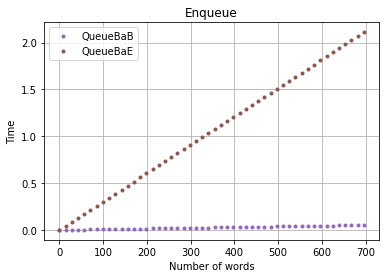

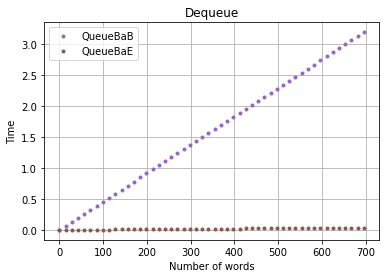

In [38]:
compare_enqueue_str('historyjka.txt')
compare_dequeue_str('historyjka.txt')

### Wnioski:
- Typ dodawanych agrumentów do kolejek nie ma znaczenia dla czasu trwania obu programów. Wykresy zachowują się tak samo niezależnie od dodawanych do nich typów;
- Operacja *wstaiania* elementu do kolejki jest wydajniejsza w przypadku kolejki *QueueBaB*, wynika to z faktu, iż jest ona rzędu O(1). Dla kolejki QueueBaE jest to operacja rzędu O(n);
- Dla *usuwania* elementów z listy wydajniejsza jest druga kolejka *QueueBaE*, gdzie operacja jest rzędu O(1), w momencie gdy dla kolejki QueueBaB jest ona rzędu O(n);
- Biorąc pod uwagę średnią ilość czasu do wstawienia i ściągnięcia obiektów z listy, wydajniejsza okazuje się być kolejka *QueueBaE*.

## <span style="color:#D47FAC;">TASK 3</span> 

Wyobraźmy sobie, że pewien hotel oferuje dla swoich gości transport z lotniska. Celem symulacji jest odpowiedź na 
pytanie ile autobusów powinno zostać podstawionych w danych odstępach czasu, aby przetransportować ludzi z lotniska 
do hotelu. Wiemy ile osób pojawia się na przystanku w ciągu minuty, jak dużo osób jest w stanie pomieścić nasz autobus
oraz jaka jest minimalna ilość osób, aby autobus został na daną godzinę podstawiony.

##### Założenia:
- autobusy nie zatrzymują się na żadnych przystankach, na trasie nikt się nie dosiada
- autobusy kursują na tej samej trasie
- minimalnie musi uzbierać się 1/3 pojemności autobusu, aby zabrać czekające osoby do hotelu
- osoby które nie zmieściły się do autobusów na daną godzinę muszą poczekać w kolejce na kolejny kurs
- liczba autobusów kursująca w ustalonym okresie czasu jest zapisywana i przechowywana na stosie 
- w ciągu każdej minuty w ciągu doby może się pojawić osoba na przystanku

##### Funkcjonalność modelu
Możemy modyfikować:
- pojemnością autobusu
- częstotliwością pojawiania się autobusu na przystanku
- maksymalną ilością osób pojawiającą się w danej minucie na przystanku


Na potrzeby symulacji liczba osób pojawiająca się w danej minucie jest losowana z określanego zakresu.


In [18]:
from math import floor
from L4_ZAD1 import QueueBaB
from L4_ZAD6 import StackUsingUL
from random import randint


class Bus():
    def __init__(self, capacity=54, interval=1):
        """
        @param capacity: max amount of passengers
        @param interval: number of 30-minutes periods
        """
        self.capacity = capacity
        self.minimum = capacity/3
        self.interval = interval


def simulation(capacity, interval=1, max_per_minute=5):
    """
    Performs a simulation how much buses is needed to transport a group of people.
    Contains list of people appearing at the bus stop per every minute.
    """
    bus = Bus()
    bus.capacity = capacity
    bus.interval = interval

    list_of_people = [randint(0, max_per_minute) for _ in range(1440)]

    waiting = QueueBaB()
    bus_plan = StackUsingUL()

    periods = [list_of_people[i:30*interval+i] for i in range(0, len(list_of_people), 30*interval)]

    for n in periods:
        group = sum(n)
        if not waiting.is_empty():
            tmp = waiting.dequeue()
        else:
            tmp = 0

        amount_of_buses = floor((group + tmp)/capacity)
        others = group % capacity
        if others >= bus.minimum:
            amount_of_buses += 1
        else:
            waiting.enqueue(others)

        bus_plan.push(amount_of_buses)

    return bus_plan

In [19]:
print(simulation(54, 4))
print(simulation(20, 1, 2))

elements in the list are [6, 6, 5, 7, 6, 6, 6, 5, 6, 6, 6, 6]
elements in the list are [1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 3, 1, 2, 1, 1, 2, 2, 2, 2]


## <span style="color:#D47FAC;">TASK 4</span> 

In [13]:
class Stack():
    """
    Klasa implementująca stos używając pythonowych list. 
    """

    def __init__(self):
        self.list_of_items = []
        
    def push(self, item):
        """
        Metoda służąca do dodawania obiektu do stosu.
        Pobiera jako argument obiekt który ma być dodany.
        Niczego nie zwraca.
        """
        self.list_of_items.append(item)
    
    def peek(self):
        """
        Metoda służąca do podawania jaki obiekt znajduje się na szczycie stosu.
        Nie pobiera argumentów.
        Zwraca obiekt znajdujący się na szczycie stosu, ale go stamtąd nie ściąga.
        """
        return self.list_of_items[len(self.list_of_items)-1]
        
    def pop(self):
        """
        Metoda służąca do ściągania obiektów ze stosu.
        Nie pobiera argumentów.
        Zwraca ściągnięty obiekt.
        """
        return self.list_of_items.pop()
    
    def is_empty(self):
        """
        Metoda służąca do sprawdzania, czy stos jest pusty.
        Nie pobiera argumentów.
        Zwraca True jeśli stos jest pusty lub False gdy nie jest.
        """
        return self.list_of_items==[]
        
    def size(self):
        """
        Metoda służąca do określania wielkości stosu.
        Nie pobiera argumentów.
        Zwraca liczbę obiektów w stosie.
        """
        return len(self.list_of_items)

    def __str__(self):
        """
        Medota odpowiadająca za nieformalną reprezentacje kolejki.
        Nie pobiera argumentów.
        """
        return str(self.list_of_items) 

Funkcja **checking_HTML_correctness** sprawdza, poprawność składni dokumentu HTML. 
Funkcja używa 2 stosów. Jeden **stack_brackets** ma za zadanie sprawdzić czy każdy nawias *<* jest dopasowany do *>*. Drugi stos **stack_tags** sprawdza, czy każdy znacznik wymagający domknięcia, posiada je.

In [56]:
def checking_HTML_correctness(filename: str):
    """
    Funkcja ma za zadanie sprawdzać poprawność składni dokumentu HTML.
    Jako argument przyjmuje nazwę pliku, który ma sprawdzić.
    Zwraca True jeśli dokument jest poprawny składniowo i False jeśli nie jest.
    """

    file_obj = open(filename, 'r')
    text = list(file_obj.read())
    ignore=['!DOCTYPE','area','base','br','br','col','command','embed','hr','img','input','keygen','link','meta','param','source','track','wbr','!--']
    stack_tags=Stack()
    stack_brackets=Stack()

    for i in range(len(text)):
        if text[i]=="<":
            stack_brackets.push(text[i])
            i+=1

            tag='' #dodajemy wszystko to co znajduje się pomiędzy '<' i '>'
            while text[i] != '>':
                tag +=text[i]
                i+=1
                
            tag= tag.split(' ')[0] #ignorujemy wszystkie atrybuty
            if stack_tags.is_empty() and (tag not in ignore):
                stack_tags.push(tag)
            elif tag in ignore:
                pass
            elif  stack_tags.is_empty()==False and (tag not in ignore):
                if tag == '/'+ stack_tags.peek():
                    stack_tags.pop()
                else:
                    stack_tags.push(tag)
        
        elif text[i]==">":
            if stack_brackets.is_empty():
                return False
            elif stack_brackets.peek()=="<":
                stack_brackets.pop()

    if stack_brackets.is_empty() and stack_tags.is_empty():
        return True
    else:
        return False

## <span style="color:#D47FAC;">TASK 5</span> 

In [11]:
class Node:

    def __init__(self, init_data):
        self.data = init_data
        self.next = None

    def get_data(self):
        return self.data

    def get_next(self):
        return self.next

    def set_data(self, new_data):
        self.data = new_data

    def set_next(self, new_next):
        self.next = new_next


class UnorderedList(object):

    def __init__(self):
        self.head = None

    def is_empty(self):
        return self.head == None

    def __str__(self):
        current = self.head
        li = []
        while current != None:
            li.append(current.get_data())
            current = current.get_next()
        s = ("[" + ', '.join(['{}'] * len(li)) + "]")
        return s.format(*li)

    def add(self, item):
        temp = Node(item)
        temp.set_next(self.head)
        self.head = temp

    def size(self):
        current = self.head
        count = 0
        while current != None:
            count = count + 1
            current = current.get_next()
        return count

    def search(self, item):
        current = self.head
        found = False
        while current != None and not found:
            if current.get_data() == item:
                found = True
            else:
                current = current.get_next()
        return found

    def remove(self, item):
        current = self.head
        previous = None
        found = False
        if self.is_empty():
            print("List already empty")
            return
        while not found:
            if current.getData() == item:
                found = True
            else:
                previous = current
                current = current.getNext()
                if current == None:
                    print("Item not found")
                    return

        if previous == None:  # jeśli usuwamy pierwszy element
            self.head = current.getNext()
        else:
            previous.setNext(current.getNext())

            #########################################################################################
    def append(self, item):
        """
        Metoda dodająca element na koniec listy.
        Przyjmuje jako argument obiekt, który ma zostać dodany.
        Niczego nie zwraca.
        """
        current = self.head
        previous = None
        temp = Node(item)

        if not self.is_empty():

            while current != None:
                previous = current
                current = current.get_next()

            previous.set_next(temp)

        else:
            self.add(item)

    def index(self, item):
        """
        Metoda podaje miejsce na liście,
        na którym znajduje się określony element -
        element pod self.head ma indeks 0.
        Przyjmuje jako argument element,
        którego pozycja ma zostać określona.
        Zwraca pozycję elementu na liście lub None w przypadku,
        gdy wskazanego elementu na liście nie ma.
        """
        index = 0
        current = self.head
        found = False

        while current != None and not found:
            if current.get_data() == item:
                found = True
                return index
            else:
                current = current.get_next()
                index += 1

    def insert(self, pos, item):
        """
        Metoda umieszcza na wskazanej pozycji zadany element.
        Przyjmuje jako argumenty pozycję,
        na której ma umiescić element oraz ten element.
        Niczego nie zwraca.
        Rzuca wyjątkiem IndexError w przypadku,
        gdy nie jest możliwe umieszczenie elementu
        na zadanej pozycji (np. na 5. miejsce w 3-elementowej liście).
        """
        current = self.head
        previous = None
        temp = Node(item)
        index = 0

        if pos > self.size() or pos < -self.size() - 1:
            raise IndexError("Wrong position!")

        else:
            if pos < 0:
                pos += self.size() + 1

            if pos == 0:
                self.add(item)

            else:
                while current != None and index < pos:
                    previous = current
                    current = current.get_next()
                    index += 1

                previous.set_next(temp)
                temp.set_next(current)

    def pop(self, pos=-1):
        """
        Metoda usuwa z listy element na zadaniej pozycji.
        Przyjmuje jako opcjonalny argument pozycję,
        z której ma zostać usunięty element.
        Jeśli pozycja nie zostanie podana,
        metoda usuwa (odłącza) ostatni element z listy.
        Zwraca wartość usuniętego elementu.
        Rzuca wyjątkiem IndexError w przypadku,
        gdy usunięcie elementu z danej pozycji jest niemożliwe.
        """
        current = self.head
        previous = None
        index = 0

        if self.is_empty():
            raise IndexError("Data structure already empty!")
        elif pos >= self.size() or pos < -self.size():
            raise IndexError("Wrong position!")

        else:
            if pos < 0:
                pos += self.size()

            if self.size() == 1:
                self.head = None
                return current.get_data()
            else:
                while current != None and index < pos:
                    previous = current
                    current = current.get_next()
                    index += 1

                if previous == None:  # jeśli usuwamy pierwszy element
                    self.head = current.get_next()
                    return current.get_data()
                else:
                    previous.set_next(current.get_next())
                    return current.get_data()

    def peek(self):
        """
        Metoda podaje wartość elementu na końcu listy
        nie ściągajac go.
        Nie pobiera argumentów.
        Jeśli lsta jest pusta, rzuca wyjątkiem IndexError.
        """
        current = self.head
        previous = None

        if not self.is_empty():

            while current != None:
                previous = current
                current = current.get_next()

            return previous.get_data()

        else:
            raise IndexError("Data structure is empty!")


In [28]:
mylist = UnorderedList()

In [29]:
mylist.add(5)
mylist.insert(1, 0)
mylist.append(4)

In [30]:
print(mylist)

[5, 0, 4]


In [31]:
mylist.pop()

4

In [32]:
mylist.pop(-5)

IndexError: Wrong position!

## <span style="color:#D47FAC;">TASK 6</span> 

In [16]:
class StackUsingUL(object):
    def __init__(self):
        self.items = UnorderedList()

    def is_empty(self):
        """
        Metoda sprawdzajacą, czy stos jest pusty.
        Nie pobiera argumentów.
        Zwraca True lub False.
        """
        return self.items.is_empty()

    def push(self, item):
        """
        Metoda umieszcza nowy element na stosie.
        Pobiera element, który ma zostać umieszczony.
        Niczego nie zwraca.
        """
        self.items.append(item)

    def pop(self):
        """
        Metoda ściąga element ze stosu.
        Nie przyjmuje żadnych argumentów.
        Zwraca ściągnięty element.
        Jeśli stos jest pusty, rzuca wyjątkiem IndexError.
        """
        return self.items.pop()

    def peek(self):
        """
        Metoda podaje wartość elementu na wierzchu stosu
        nie ściągajac go.
        Nie pobiera argumentów.
        Zwraca wierzchni element stosu.
        Jeśli stos jest pusty, rzuca wyjątkiem IndexError.
        """
        return self.items.peek()

    def size(self):
        """
        Metoda zwraca liczę elementów na stosie.
        Nie pobiera argumentów.
        Zwraca liczbę elementów na stosie.
        """
        return self.items.size()

    def __str__(self):
        return str(self.items)


## <span style="color:#D47FAC;">TASK 7</span> 

In [17]:
class DequeueUsingUL(object):

    def __init__(self):
        self.items = UnorderedList()

    def is_empty(self):
        """
        Metoda sprawdzajacą, czy kolejka jest pusta.
        Nie pobiera argumentów.
        Zwraca True lub False.
        """
        return self.items.is_empty()

    def add_left(self, item):
        """
        Metoda dodaje element do kolejki z lewej strony.
        Pobiera jako argument element, który ma zostać dodany.
        Niczego nie zwraca.
        """
        self.items.add(item)

    def add_right(self, item):
        """
        Metoda dodaje element do kolejki z prawej strony.
        Pobiera jako argument element, który ma zostać dodany.
        Niczego nie zwraca.
        """
        self.items.append(item)

    def remove_left(self):
        """
        Metoda usuwa element z kolejki z lewej strony.
        Nie pobiera argumentów.
        Zwraca usuwany element.
        W przypadku pustej kolejku rzuca wyjątkiem IndexError
        """
        return self.items.pop(0)

    def remove_right(self):
        """
        Metoda usuwa element z kolejki z prawej strony.
        Nie pobiera argumentów.
        Zwraca usuwany element.
        W przypadku pustej kolejku rzuca wyjątkiem IndexError
        """
        return self.items.pop()

    def size(self):
        """
        Metoda zwraca liczę elementów na w kolejce.
        Nie pobiera argumentów.
        Zwraca liczbę elementów na w kolejce.
        """
        return self.items.size()

## <span style="color:#D47FAC;">TASK 8</span> 

In [39]:
mylist = UnorderedList()
pylist = []

#### Dodawanie elementów do listy na początku i na końcu

In [40]:
def list_analysis(n):
   
    startml_1=time.time()
    for i in range(n):
        mylist.add(i)
    endml_1= time.time()
        
    startpy_1=time.time()
    for i in range(n):
        pylist.insert(0, i)
    endpy_1=time.time()
    
    startml_n=time.time()
    for _ in range(n):
        mylist.append(i)
    endml_n= time.time()
    
    startpy_n=time.time()
    for _ in range(n):
        pylist.append(i)
    endpy_n=time.time()
    
    #średnia czasów z dodawania i usuwania 
    #idk jak do dokończyć ;/
    #sr_ml=(endB1-startB1+endE1-startE1)/2
    #sr_py=(endB2-startB2+endE2-startE2)/2
    
    return endml_1-startml_1, endpy_1-startpy_1,endml_n-startml_n,endpy_n-startpy_n, #sr_ml, sr_py

In [41]:
def add_first(n): #number of elements
    
    xb=np.linspace(0,n)
    timeb=np.linspace(0,list_analysis(n)[0])
    xe=np.linspace(0,n)
    timee=np.linspace(0,list_analysis(n)[1])
    

    plt.plot(xb,timeb, 'C4.',label='UnorderedList')
    plt.plot(xe,timee, 'C5.', label='Python list')
    plt.xlabel('Number of elements')
    plt.ylabel('Time')
    plt.title("Adding to the first position")

    plt.legend()
    plt.grid()
    plt.show()

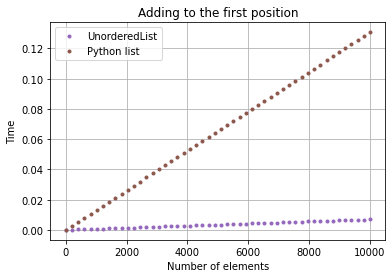

In [42]:
add_first(10000)

Zauważmy, że listy pythonowskie są szybsze jeśli chodzi o dodawanie elementów.

In [43]:
def add_last(n): #number of elements
    
    xb=np.linspace(0,n)
    timeb=np.linspace(0,list_analysis(n)[2])
    xe=np.linspace(0,n)
    timee=np.linspace(0,list_analysis(n)[3])
    

    plt.plot(xb,timeb, 'C4.',label='UnorderedList')
    plt.plot(xe,timee, 'C5.', label='Python list')
    plt.xlabel('Number of elements')
    plt.ylabel('Time')
    plt.title("Adding to the last position")
    
    #plt.plot(xe,timee, 'C2.', label='Python list')
    #plt.xlabel('Number of elements')
    #plt.ylabel('Time')
    #plt.title("Adding to the last position")
    
    
    plt.legend()
    plt.grid()
    plt.show()

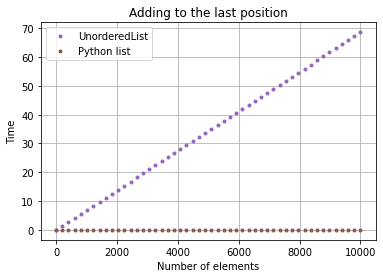

In [44]:
add_last(10000)

#### Analiza metody pop

In [45]:
def pop_analysis(n):
    
    startml=time.time()
    for i in range(n):
        mylist.pop()
    endml= time.time()
        
    startpy=time.time()
    for i in range(n):
        pylist.pop()
    endpy=time.time()
    
    return endml-startml, endpy-startpy

In [46]:
def pop_method(n): #number of elements
    
    xb=np.linspace(0,n)
    timeb=np.linspace(0,pop_analysis(n)[0])
    xe=np.linspace(0,n)
    timee=np.linspace(0,pop_analysis(n)[1])
    

    plt.plot(xb,timeb, 'C1.',label='UnorderedList')
    plt.xlabel('Number of elements')
    plt.ylabel('Time')
    plt.title("Using pop method")
    
    plt.plot(xe,timee, 'C2.', label='Python list')
    plt.xlabel('Number of elements')
    plt.ylabel('Time')
    plt.title("Using pop method")
    
    
    plt.legend()
    plt.grid()
    plt.show()

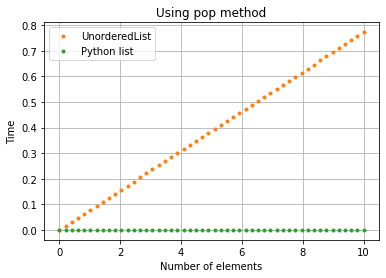

In [47]:
pop_method(10)

### Wnioski:
- **Dodawanie** elementów do listy jest wydajniejsze w przypadku naszej **UnorderedList**. Operacja ta jest rzędu O(1).
- **Usuwanie** elementów z listy jest natomiast wydajniejsze w przypadku wbudowanych **list pythonowych**, gdzie operacja jest rzędu O(1). Dla UnorderedList jest to operacja rzędu O(n).

#### <span style="color:#D47FAC;"> <center> Link to our code: https://github.com/maggszy/date_algorithm/blob/main/list4/lista4.ipynb </center> </span>